# ⚒️ Mining Dickens ⚒️ Part I: Off-the shelf NLP tagging and quantitative data exploration

## Import the texts

Let's first import the text of some novels. We'll use _Great Expectations_, _Oliver Twist_ and _David Copperfield_. Several out-of-copyright texts such as these can be freely downloaded from [Project Gutenberg](https://www.gutenberg.org), where you'll find also many non-English works if you'd like to experiment with your own texts.

In [1]:
with open('../inputs/data/greatexpectations.txt', 'r') as intxt:
    greatexpectations = intxt.read()

with open('../inputs/data/olivertwist.txt', 'r') as intxt:
    olivertwist = intxt.read()

with open('../inputs/data/davidcopperfield.txt', 'r') as intxt:
    davidcopperfield = intxt.read()

## Basic preprocessing

Now we start with the _preprocessing_ stage of text analysis - which is well-known to be time-consuming (and often more so than the analysis itself!). The next step needs to be bespoke for each of the files. For each text, we remove unwanted text that isn't part of the novel. To determine this you'll need to have a look at the individual files and establish which string can unequivocably be considered as the cut-off point for the beginning and end of the novel:

In [2]:
greatexpectations = greatexpectations.split(' Chapter LIX. AND LAST')[-1].strip()
greatexpectations = greatexpectations.split('*** END OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***')[0].strip()

olivertwist = olivertwist.split('LIII     AND LAST')[-1].strip()
olivertwist = olivertwist.split('*** END OF THE PROJECT GUTENBERG EBOOK OLIVER TWIST ***')[0].strip()

davidcopperfield = davidcopperfield.split('THE PERSONAL HISTORY AND EXPERIENCE OF DAVID COPPERFIELD THE YOUNGER')[-1].strip()
davidcopperfield = davidcopperfield.split('*** END OF THE PROJECT GUTENBERG EBOOK DAVID COPPERFIELD ***')[0].strip()

We will now define a very simple function to clean the text from anything that's not a alphabetic character or a space. We will use the package [`re`]((https://docs.python.org/3/library/re.html)) to achieve this. **Reg**ular **ex**pressions (_regex_) can get very complex, but we'll stick to a few simple ones. To check more complex regex on the fly, I recommend [this website](https://regex101.com).

In [3]:
import re

In [4]:
def cleantxt(text):
    newtext = re.sub('-\n', '', text) # Remove linebreaks within words if they exist
    newtext = re.sub('\n', ' ', newtext) # Remove ordinary linebreaks
    newtext = re.sub(r'[^a-zA-Z\s]', ' ', str(newtext)) # Remove anything that is not a space or a letter
    return newtext

And let's apply the function to each text.

In [5]:
greatexpectations_clean = cleantxt(greatexpectations)
olivertwist_clean = cleantxt(olivertwist)
davidcopperfield_clean = cleantxt(davidcopperfield)

We now define a function for returning a set with all the unique _word forms_ in a text:

In [6]:
def get_unique_words(text):
    unique_vocab_set = {word.lower() for word in text.split()} # this splits on any whitespace, including tabs!
    unique_vocab_set.discard('') # in case any blank is left oer
    return unique_vocab_set

And apply that function:

In [7]:
greatexpectations_unique_words = get_unique_words(greatexpectations_clean)
olivertwist_unique_words = get_unique_words(olivertwist_clean)
davidcopperfield_unique_words = get_unique_words(davidcopperfield_clean)

Let's run a quick check of the number of unique words in each of the novels:

In [8]:
print('Number of unique words:')

print('Great Expectations:', len(greatexpectations_unique_words))
print('Oliver Twist:', len(olivertwist_unique_words))
print('David Copperfield:', len(davidcopperfield_unique_words))

Number of unique words:
Great Expectations: 10756
Oliver Twist: 10155
David Copperfield: 13880


Also keep in mind the size of the novels themselves:

In [9]:
print('Size of novels (after basic cleaning):')

print('Great Expectations:', len(greatexpectations_clean.split()))
print('Oliver Twist:', len(olivertwist_clean.split()))
print('David Copperfield:', len(davidcopperfield_clean.split()))

Size of novels (after basic cleaning):
Great Expectations: 188924
Oliver Twist: 161508
David Copperfield: 362878


We could visualize the words that the three novels have in common with a Venn diagram. We'll use one of the most popular packages for plotting with Python, [`matplotlib`](https://matplotlib.org). We'll also use [`matplotlib_venn`](https://pypi.org/project/matplotlib-venn/) for plotting Venn diagrams specifically. 

In [10]:
# !pip install matplotlib
# !pip install matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

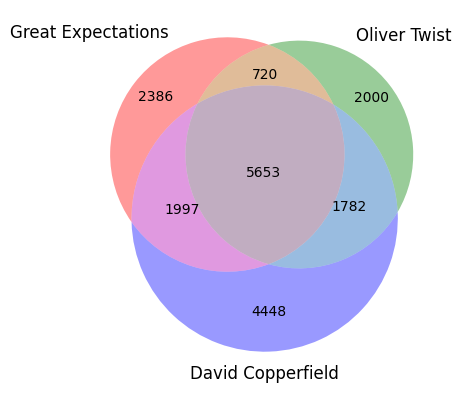

In [11]:
venn3([greatexpectations_unique_words, olivertwist_unique_words, davidcopperfield_unique_words], 
      ('Great Expectations', 'Oliver Twist', 'David Copperfield'))

plt.show()

Now, that was a very crude way of looking at common word forms in the three novels. In a real-world scenario, we probably want to check actual _vocabulary words_, i.e. **lemmata**, not any inflected form of the same lemma. We can do that with the help of one of several off-the-shelf tools for text processing in Python, e.g. `spaCy` and the Natural Language Toolkit (`nltk`). We'll use spaCy's pretrained English model.

In [12]:
# !pip install spacy
import spacy
# !python -m spacy download en_core_web_sm # prepending "!" makes this run as a command line input
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
nlp.max_length = 2000000 # default limit for spacy is 1M, but we need more than that. You can check the length of your text with len(text)

Now we have a spaCy model loaded, which we called `nlp`. In the spaCy [docs](https://spacy.io), you can find all the details on what you can achieve with a pretrained model. We will now test it out on a sample sentence first:

In [13]:
sample_sentence = "I can't wait to see what this lecture will teach me"

Let's run the sentence through the spaCy model:

In [14]:
sample_sentence = nlp(sample_sentence)

We can now use the processed sentence to extract things like lemmata and part-of-speech:

In [15]:
for token in sample_sentence:
    print(token, (token.lemma_ + '_' + token.pos_))

I I_PRON
ca ca_AUX
n't n't_PART
wait wait_VERB
to to_PART
see see_VERB
what what_PRON
this this_DET
lecture lecture_NOUN
will will_AUX
teach teach_VERB
me I_PRON


Let's then run spaCy on the novels (this step will take a while!):

In [16]:
greatexpectations_nlp = nlp(greatexpectations_clean)
olivertwist_nlp = nlp(olivertwist_clean)
davidcopperfield_nlp = nlp(davidcopperfield_clean)

You can check that it worked on a random sentence of one of these:

In [17]:
for token in greatexpectations_nlp[25:45]:
    print(token, token.lemma_, token.pos_, token.dep_)

nothing nothing PRON dobj
longer long ADV advmod
or or CCONJ cc
more more ADV conj
explicit explicit ADJ acomp
than than ADP prep
Pip Pip PROPN pobj
    SPACE dep
So so ADV advmod
    SPACE dep
I I PRON nsubj
called call VERB ROOT
myself myself PRON dobj
Pip Pip PROPN oprd
    SPACE dep
and and CCONJ cc
came come VERB conj
to to PART aux
be be AUX auxpass
called call VERB advcl


Let's redefine the function for returning the vocabulary of the texts by including the processing through the spaCy model:

In [18]:
def get_vocab(text_nlp):
    vocab_set = {token.lemma_ + '_' + token.pos_ for token in text_nlp}
    vocab_set.discard('') # in case any blank is left over
    return vocab_set

And run the function on each spaCy-processed novel:

In [19]:
greatexpectations_vocab = get_vocab(greatexpectations_nlp)
olivertwist_vocab = get_vocab(olivertwist_nlp)
davidcopperfield_vocab = get_vocab(davidcopperfield_nlp)

Check the vocabulary size of each novel again:

In [20]:
print(len(greatexpectations_vocab))
print(len(olivertwist_vocab))
print(len(davidcopperfield_vocab))

10207
9477
13209


We can see that, naturally, the sizes have decreased after lemmatization. 

Let's visualize the intersections between their vocabularies once again:

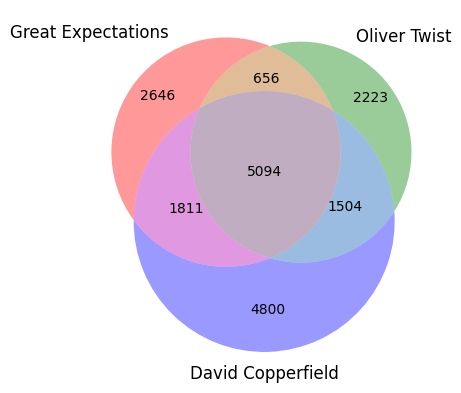

In [21]:
venn3([greatexpectations_vocab, olivertwist_vocab, davidcopperfield_vocab], 
      ('Great Expectations', 'Oliver Twist', 'David Copperfield'))

plt.show()

## Named entity recognition

We can try to identify the major characters of a novel with the help of a rather important NLP method called Named Entity Recognition (NER), which automatically identifies likely candidates for places, people and different categories of abstract and concrete objects (depending on the model). 

We'll stick to the English model that we have already fetched from spaCy to do this. Since we've already processed the novels with the spaCy model, we actually already have named entities identified in them. Let's have a look at a random sentence in one of the novels. We can use `displacy` to highlight entities in the cell output:

In [22]:
displacy.render(olivertwist_nlp[1300:1500], style="ent")

Next we are going to try and automatically identify the names of the major characters in each novel by using the named entities that have been categorized by spaCy as `PERSON`. We'll then count their occurrences in the texts, sort them by frequency and take the _n_ most frequent ones. Let's use `Counter` to count the occurrences and let's then organize the counts in a `dataframe` using the very popular data analysis package [`pandas`](https://pandas.pydata.org).

In [23]:
# !pip install pandas
from collections import Counter
import pandas as pd
# pd.options.display.max_colwidth = 400

The following cell initializes an empty list which we call `people` and iterates over all identified entities in the novel (we'll try this out on _Oliver Twist_ first), which we can access using the `.ents` attribute and if the label of this attribute is `PERSON` we'll append it to the list `people`. We'll then perform a `Counter` on this list, sort them by frequency (with the Counter-built-in method `.most_common()`) and put the counts in a dataframe with two columns: `character` and `count` (i.e. how many times it appears in the text).

In [24]:
people = []

for named_entity in olivertwist_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)


people_count = Counter(people)

df_characters_olivertwist = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

Have a look at the top-20 identified people in _Oliver Twist_:

In [25]:
df_characters_olivertwist.head(20)

,character,count
0,Oliver,624
1,Sikes,299
2,Fagin,204
3,Noah,107
4,Nancy,96
5,Bill,64
6,Grimwig,52
7,Mrs Mann,51
8,Don,51
9,Sowerberry,47


Let's do the same for the other two novels:

In [26]:
# Great Expectations
people = []
for named_entity in greatexpectations_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)
people_count = Counter(people)
df_characters_greatexpectations = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

# David Copperfield
people = []
for named_entity in davidcopperfield_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)
people_count = Counter(people)
df_characters_davidcopperfield = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

Have a look that it worked:

In [27]:
df_characters_greatexpectations.head(10)

,character,count
0,Joe,605
1,Herbert,272
2,Havisham,263
3,Wemmick,215
4,Estella,100
5,Provis,62
6,Wopsle,59
7,Mrs Joe,53
8,Don,48
9,Biddy,39


In [28]:
df_characters_davidcopperfield.head(10)

,character,count
0,Dora,421
1,Copperfield,410
2,Steerforth,282
3,Dick,214
4,Uriah,171
5,Wickfield,169
6,Miss Murdstone,154
7,Jip,95
8,Traddles,88
9,Mrs Crupp,88


We can now use these characters for a variety of tasks, including the very practical one of removing so-called _stop words_ (see next).

## Word frequencies

A useful first exploratory step, beside looking at the size of vocabulary, is checking the most frequently occurring words in each of the novels. However, definitely not all words informative---removing so-called **stop words** from the text, before perfoming this type of exploratory analysis, is a crucial step to avoid getting useless noise. Stop words are words occurring extremely frequently in a text and are mostly functional words, such as _is_, _not_, _and_, _to_. Let's start by removing those from the texts before checking the most frequent words.

The list of stop words we will use was compiled by [Google](https://code.google.com/archive/p/stop-words/) in 2011. Quite dated if you plan to use it on contemporary data, but since it's Dickens, it's the most complete you will probably find.

Let's first import the Google stop words and put them in a `list`:

In [29]:
google_stopwords = []
with open('../inputs/google-stopwords.txt') as intxt:
    for word in intxt.readlines():
        google_stopwords.append(word.strip())

In [30]:
google_stopwords[1:20]

['about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Let's import the stopwords for English and add the name of the characters found via NER in the previous section (we don't want them to figure among the most frequent words!). Since named entities can also be phrases like _Miss Murdstone_, we will first split any phrase into its components, so that, both _Miss_ and _Murdstone_ will be considered as separate stopwords. Since not all identified `PERSON`-type entities will in fact be characters, we'll only consider the first 50 for each novel. Also, we will work with lowercased words, since any count method will count, e.g., character and CHARACTER as two separate lemmata, even though they are in fact the same. 

In [31]:
allcharacters = list(df_characters_davidcopperfield['character'][:50]) + list(df_characters_olivertwist['character'][:50]) + list(df_characters_greatexpectations['character'][:50])

dickensstopwords = []

for character in allcharacters:
    character = character.lower()
    character = character.split(' ') # the result is a list, so we ADD it to the existing list
    dickensstopwords = dickensstopwords + character

# Let's add the stopwords from Google to our character list
dickensstopwords = google_stopwords + dickensstopwords
dickensstopwords = list(dict.fromkeys(dickensstopwords))

We now want to have a look at the most frequent words in each novel to check whether they can tell us anything interesting (and just because it's fun). Again, we don't want to look at every inflected form of a lemma, but at the frequency of the lemmata themselves. 

Let's first lemmatize the whole text of each novel:

In [32]:
greatexpectations_lemmatized = " ".join([token.lemma_ for token in greatexpectations_nlp])
olivertwist_lemmatized = " ".join([token.lemma_ for token in olivertwist_nlp])
davidcopperfield_lemmatized = " ".join([token.lemma_ for token in davidcopperfield_nlp])

Have a look at the lemmatize texts:

In [33]:
greatexpectations_lemmatized[0:500]

'chapter I     my father s family name be Pirrip   and my christian name Philip   my infant tongue could make of both name nothing long or more explicit than Pip   so   I call myself Pip   and come to be call Pip    I give Pirrip as my father s family name   on the authority of his tombstone and my sister   Mrs   Joe Gargery   who marry the blacksmith   as I never see my father or my mother   and never see any likeness of either of they   for their day be long before the day of photograph    my f'

From the lemmatize text, let's now remove the stopword list we created and lower case the text. We can write a little function for this:

In [34]:
def removestopwords(text,stopword_list):
    text_nostopwords = ' '.join([word.lower() for word in text.split() if word.lower() not in stopword_list])
    return text_nostopwords

Apply the function to the lemmatized texts:

In [35]:
greatexpectations_nostopwords = removestopwords(greatexpectations_lemmatized,dickensstopwords)
olivertwist_nostopwords = removestopwords(olivertwist_lemmatized,dickensstopwords)
davidcopperfield_nostopwords = removestopwords(davidcopperfield_lemmatized,dickensstopwords)

Have a look at the text without stopwords:

In [36]:
davidcopperfield_nostopwords[0:500]

'chapter bear turn hero life station hold life life record bear inform friday clock night remark clock strike simultaneously consideration birth declare nurse sage woman neighbourhood lively month possibility personally acquaint destine unlucky life privileged ghost spirit gift inevitably attach unlucky infant gender bear small friday night head history prediction verify falsify result branch remark inheritance baby complain property enjoyment heartily bear caul advertise sale newspaper price gui'

Let's now have a quick look at the most frequent words in each novel through [word clouds](https://en.wikipedia.org/wiki/Tag_cloud):

Great Expectations:


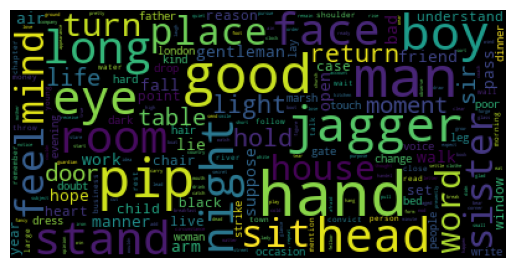

Oliver Twist:


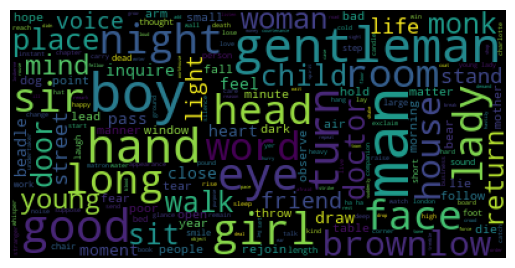

David Copperfield:


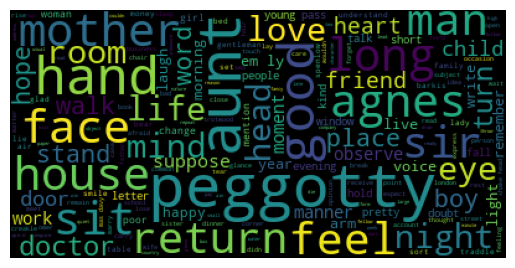

In [37]:
# !pip install wordcloud
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

There are all sorts of things in there. Thanks to the NLProcessed text, we could look at the most frequent words by PoS. We can check, for example, the most frequent verbs and adjectives. Let's only take the verbs first:

In [38]:
greatexpectations_verbs = " ".join([token.lemma_ for token in greatexpectations_nlp if token.pos_ == 'VERB'])
olivertwist_verbs = " ".join([token.lemma_ for token in olivertwist_nlp if token.pos_ == 'VERB'])
davidcopperfield_verbs = " ".join([token.lemma_ for token in davidcopperfield_nlp if token.pos_ == 'VERB'])

In [39]:
greatexpectations_verbs[0:500]

'make call come call give marry see see regard derive give draw freckle sickly arrange give try get live entertain bear pocket take wound seem gain find overgrow bury bury intersect scatter feed rush grow begin cry hold cry start keep cut tie soak smother cut sting tear limp shiver glare growl chatter seize cut plead pray do tell say say stare give show live say pint point lie pollard look turn empty be come make go see come say seat eat say lick cheek get believe darn couldn eat say han express '

Let's again remove uninteresting words (stopwords):

In [40]:
greatexpectations_verbs = removestopwords(greatexpectations_verbs,dickensstopwords)
olivertwist_verbs = removestopwords(olivertwist_verbs,dickensstopwords)
davidcopperfield_verbs = removestopwords(davidcopperfield_verbs,dickensstopwords)

And generate new word clouds:

Great Expectations:


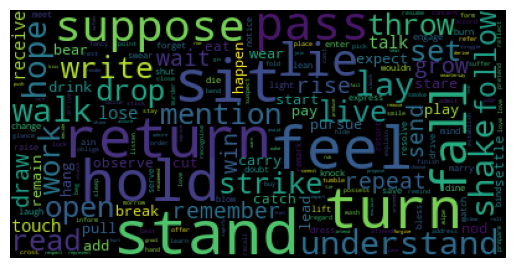

Oliver Twist:


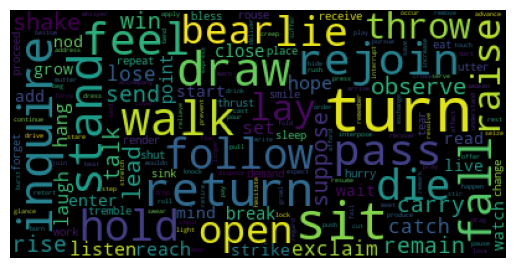

David Copperfield:


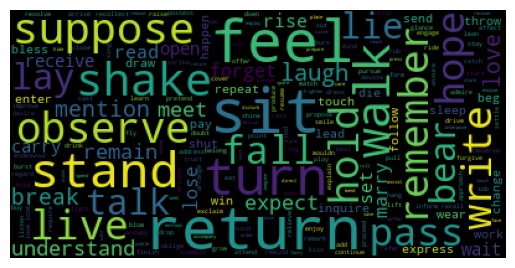

In [41]:
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's try the same with adjectives:

In [42]:
greatexpectations_adjectives = " ".join([token.lemma_ for token in greatexpectations_nlp if token.pos_ == 'ADJ'])
olivertwist_adjectives = " ".join([token.lemma_ for token in olivertwist_nlp if token.pos_ == 'ADJ'])
davidcopperfield_adjectives = " ".join([token.lemma_ for token in davidcopperfield_nlp if token.pos_ == 'ADJ'])

greatexpectations_adjectives = removestopwords(greatexpectations_adjectives,dickensstopwords)
olivertwist_adjectives = removestopwords(olivertwist_adjectives,dickensstopwords)
davidcopperfield_adjectives = removestopwords(davidcopperfield_adjectives,dickensstopwords)

In [43]:
greatexpectations_adjectives[0:500]

'christian explicit odd square stout dark curly black childish long neat sacred universal indebted marsh vivid broad memorable raw bleak dead dead dark flat distant small afraid terrible fearful coarse broken lamed sudden high young fat undersized threatening tight short giddy upright sick tremendous upright fearful small young young young young secret young warm comfortable safe young open young young broken dead young goo good cold flat green young dead stiff good sore heavy long black horizont'

Great Expectations:


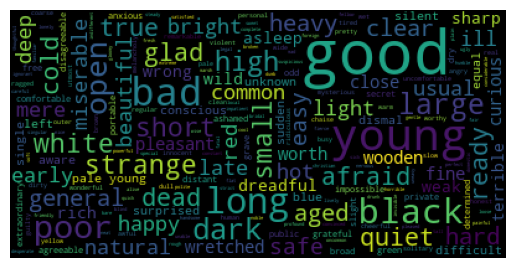

Oliver Twist:


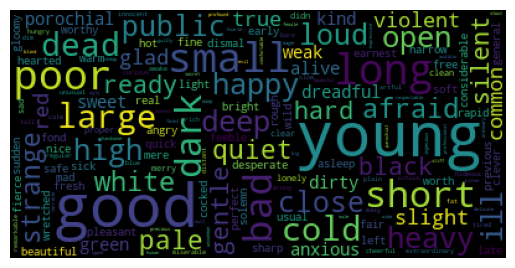

David Copperfield:


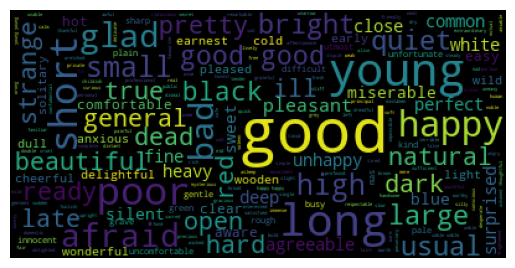

In [44]:
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()